# Portfolio Notebook

This notebook presents a clean, professional analysis. All content has been standardized to English and any school-related metadata has been removed while preserving the original computations and embedded outputs.


1.1. Bibliotecas necesarias

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score
import numpy as np
from scipy.stats import hmean
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from scipy.stats import hmean
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

df = pd.read_csv('breastcancer.csv')

1.2. Exploración inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_limpio = df.drop(columns=['Unnamed: 32'])

df_clean = df_limpio.drop(columns=['id'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_clean.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Comprobación valores nulos
df_clean.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0



Conteo de instancias por clase en 'diagnosis':
diagnosis
B    357
M    212
Name: count, dtype: int64

Porcentaje de instancias por clase en 'diagnosis':
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


<ipython-input-7-c588ff1fe0df>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['#FF9999', '#66B3FF'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


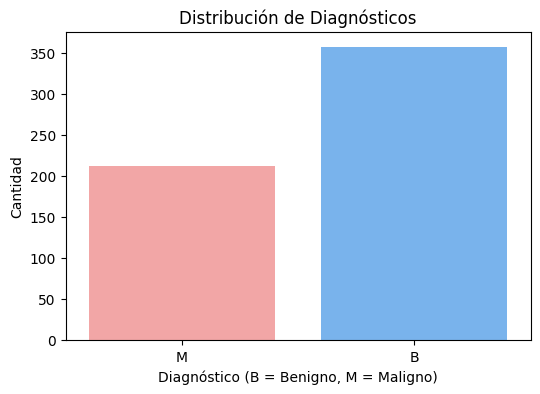

In [ ]:
conteo_diagnostico = df['diagnosis'].value_counts()
print("\nConteo de instancias por clase en 'diagnosis':")
print(conteo_diagnostico)

porcentaje_diagnostico = df['diagnosis'].value_counts(normalize=True) * 100
print("\nPorcentaje de instancias por clase en 'diagnosis':")
print(porcentaje_diagnostico)

# Gráfico
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette=['# FF9999', '#66B3FF'])
plt.title('Distribución de Diagnósticos')
plt.xlabel('Diagnóstico (B = Benigno, M = Maligno)')
plt.ylabel('Cantidad')
plt.show()

## Section

In [ ]:
df_limpio = df.drop(columns=['Unnamed: 32'])

df_clean = df_limpio.drop(columns=['id'])

# Verificar si existen valores nulos
null_values = df_clean.isnull().sum()
print("Valores nulos por columna:")
print(null_values)

# Verificar si existen filas duplicadas
duplicates = df_clean.duplicated().sum()
print(f"Filas duplicadas: {duplicates}")

df_clean['diagnosis'] = df_clean['diagnosis'].map({'B': 0, 'M': 1})

print("Primeras filas del dataset limpio:")
df_clean.head()

Valores nulos por columna:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Filas duplicadas: 0
Primeras filas del dataset limpio:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2.2 Data  atípicos

(569, 31)


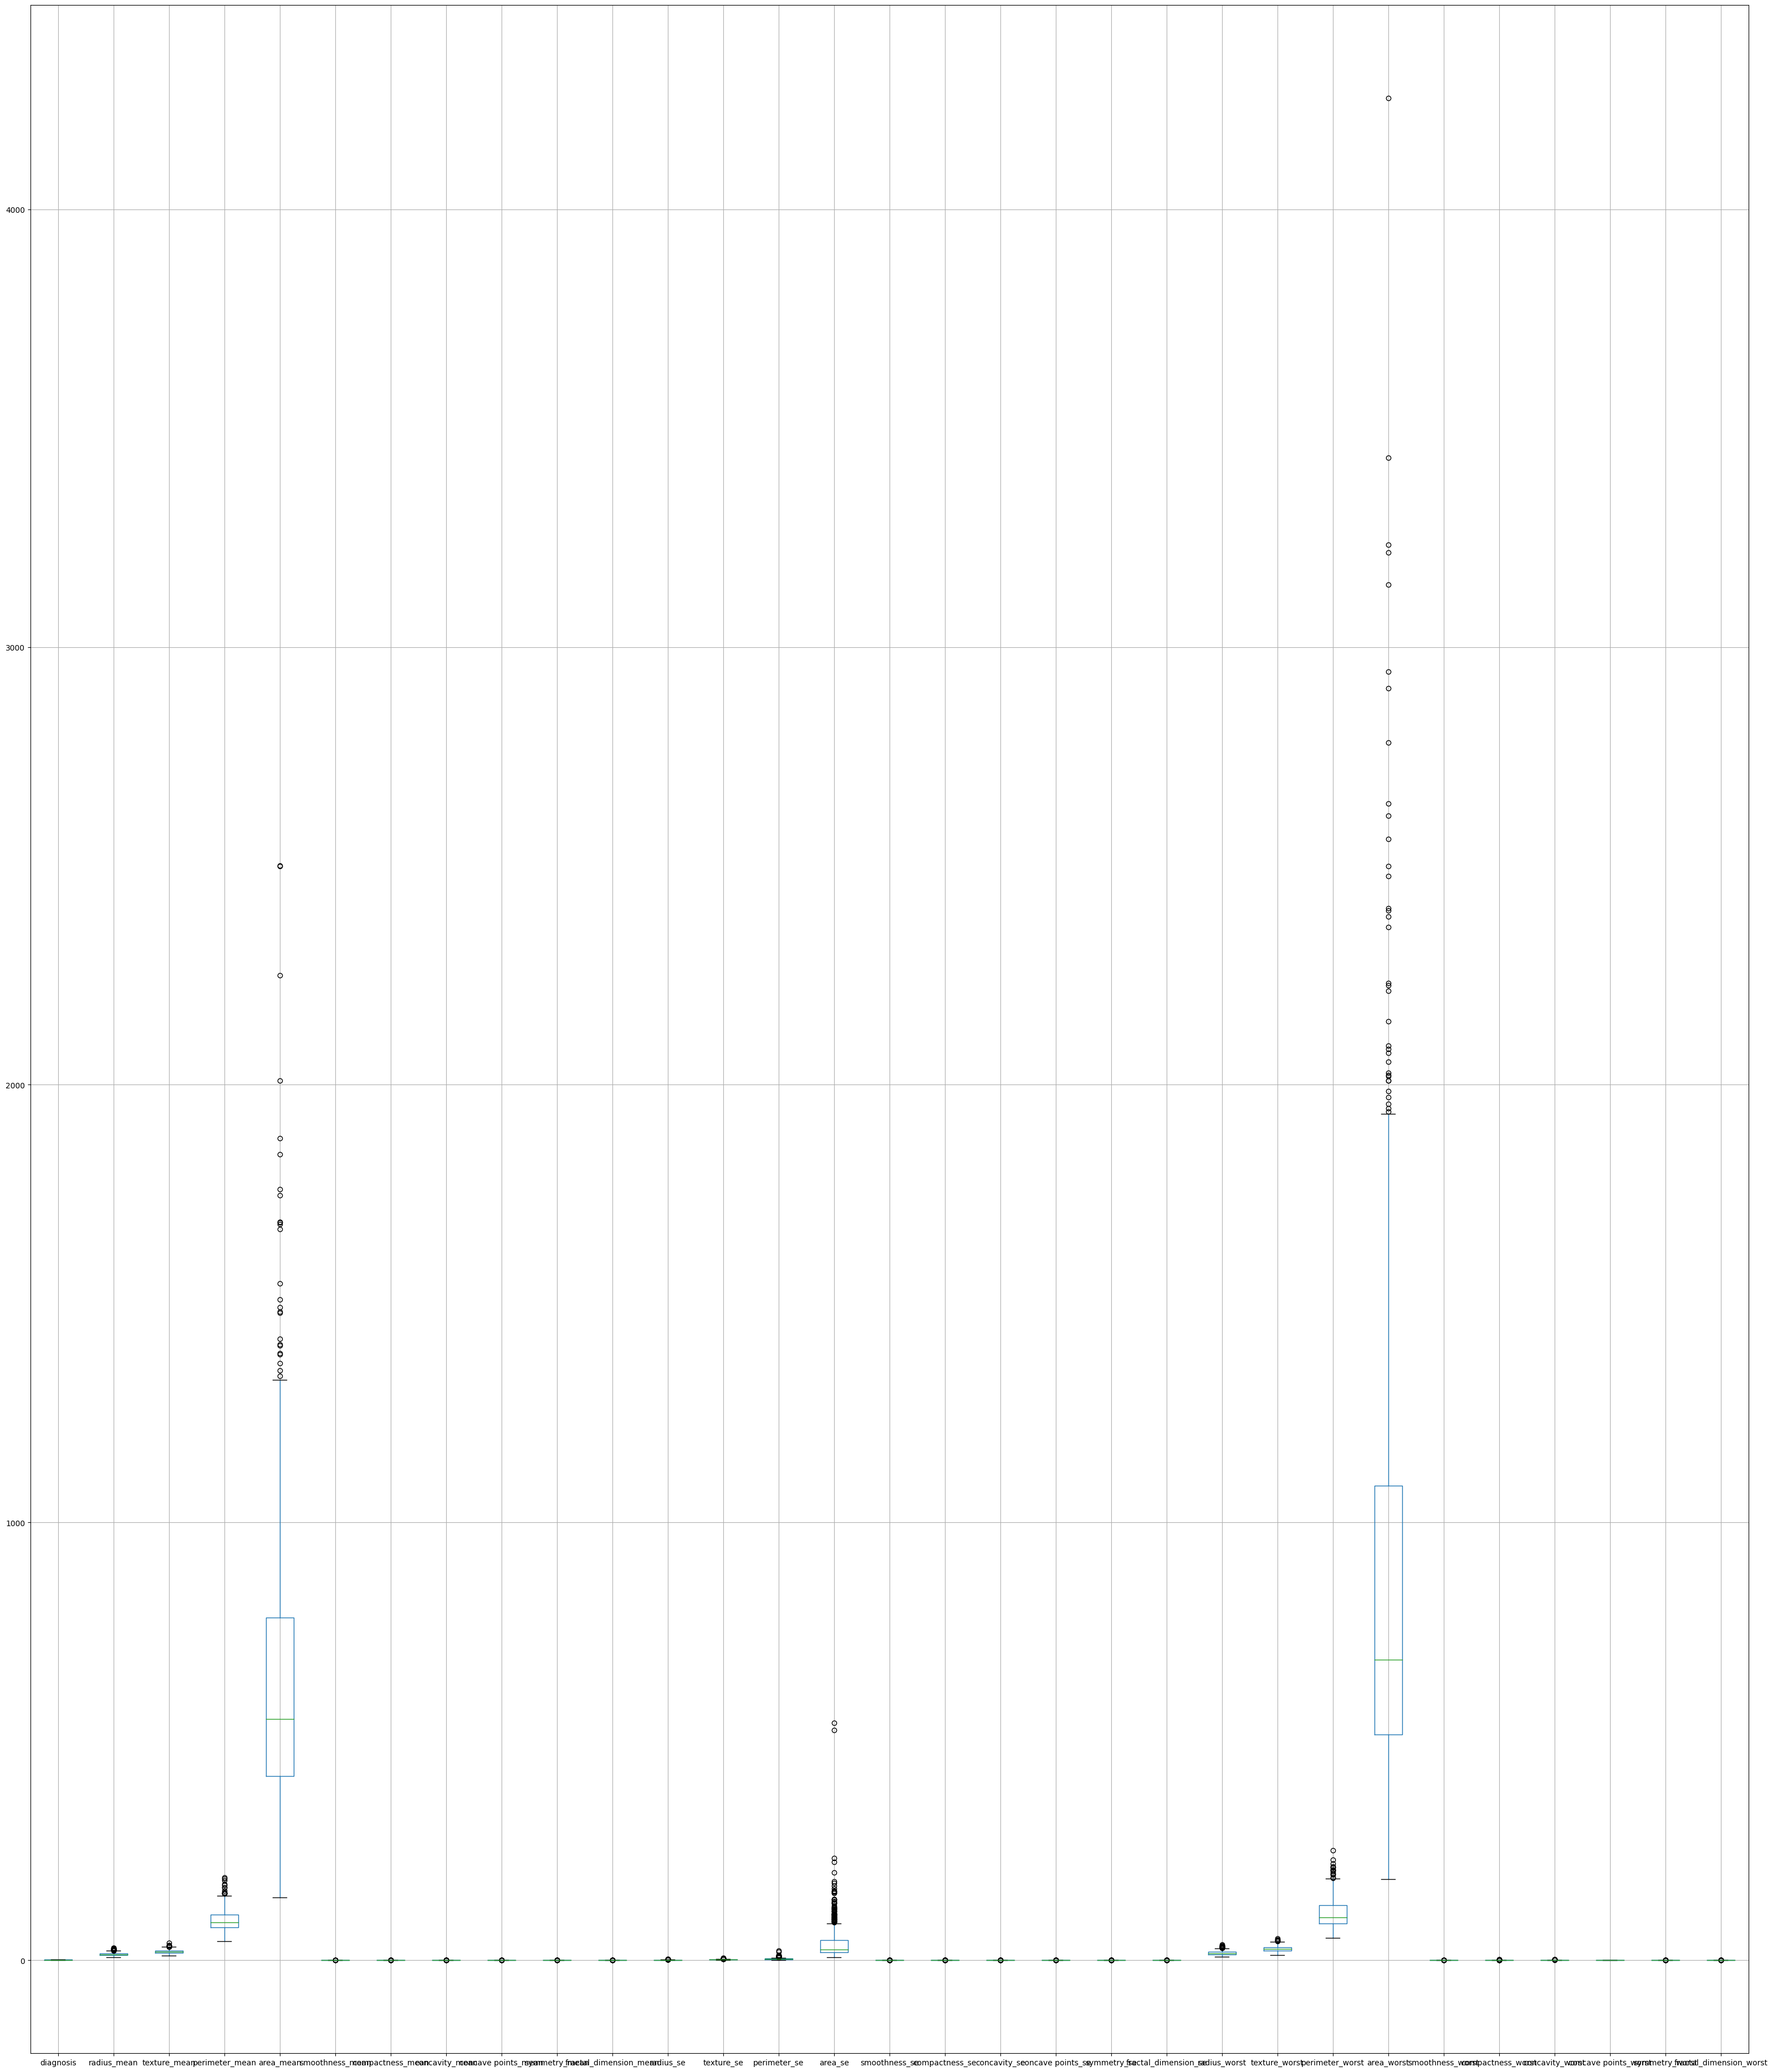

In [ ]:
df_clean.boxplot(figsize=(40, 48))
print(df_clean.shape)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

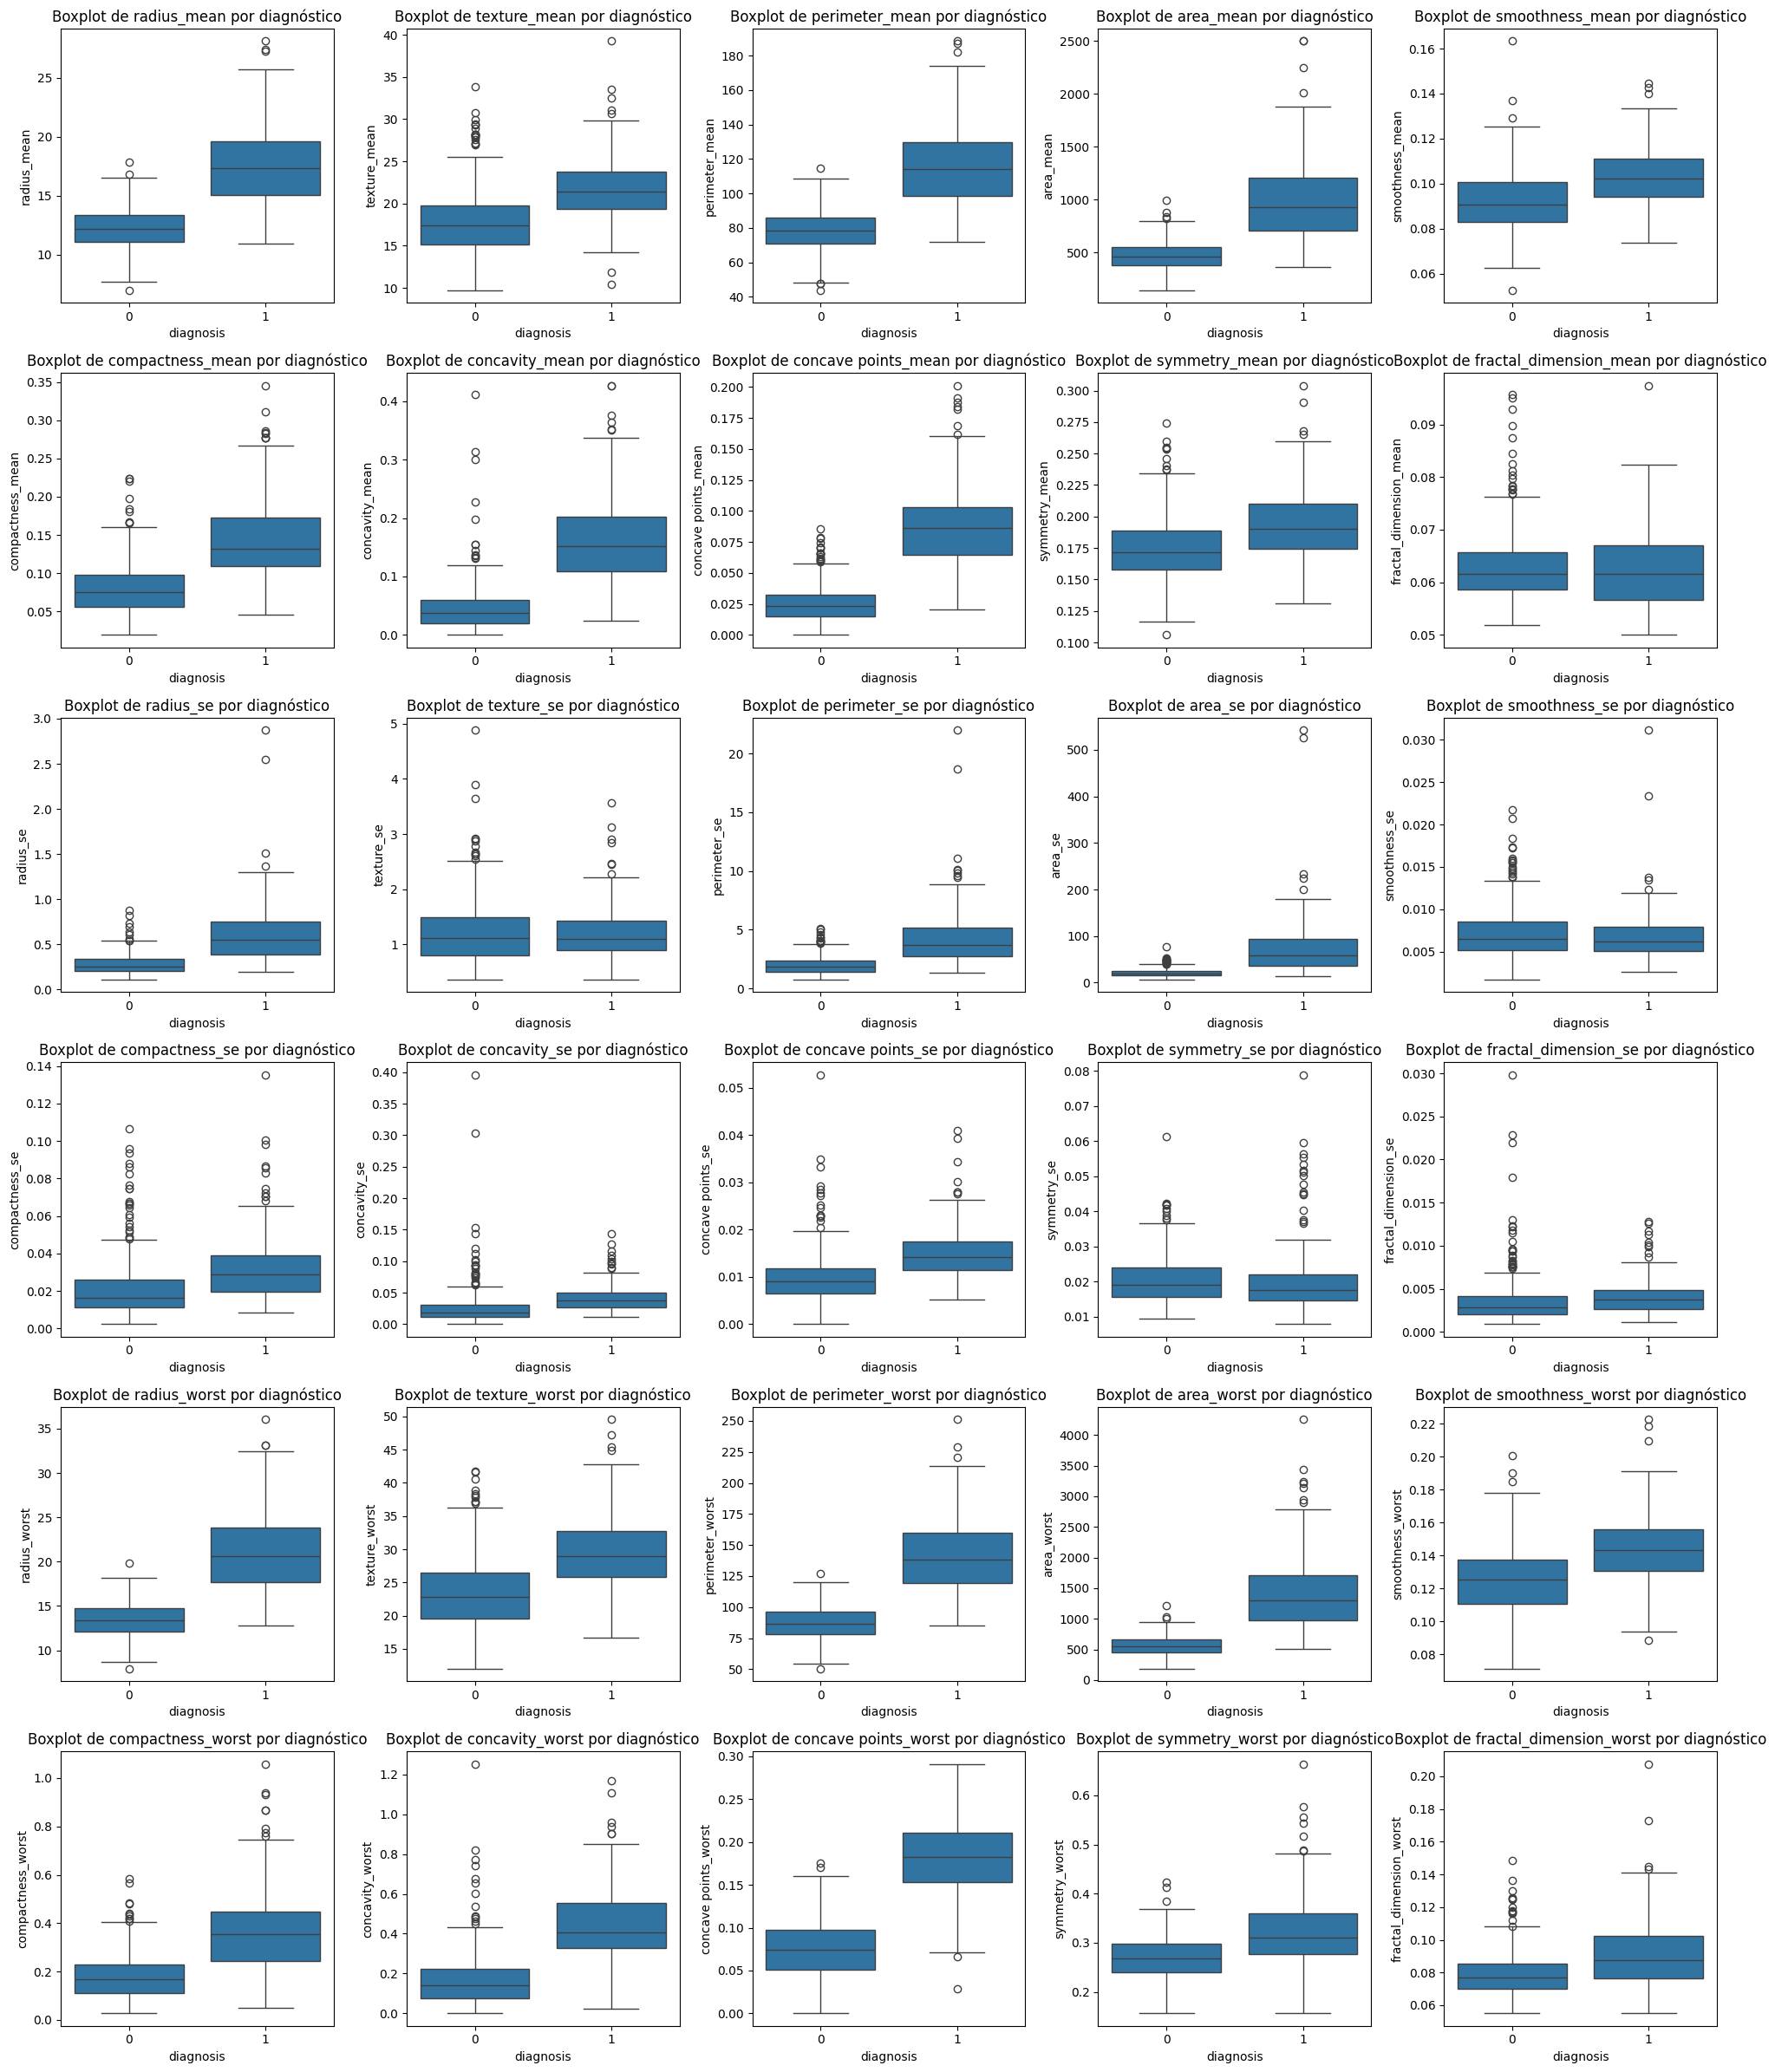

In [ ]:
variables = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
             'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
             'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
             'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
             'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
             'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 24))

axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.boxplot(x='diagnosis', y=variable, data=df_clean, ax=axes[i])
    axes[i].set_title(f'Boxplot de {variable} por diagnóstico')

plt.tight_layout()
plt.show()

2.3 Estandarizar datos

In [ ]:
X = df_clean.drop(columns=['diagnosis'])  # Variables predictoras
y = df_clean['diagnosis']  # Variable objetivo

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Datos estandarizados:\n")
X_scaled_df.head()

Datos estandarizados:



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Section

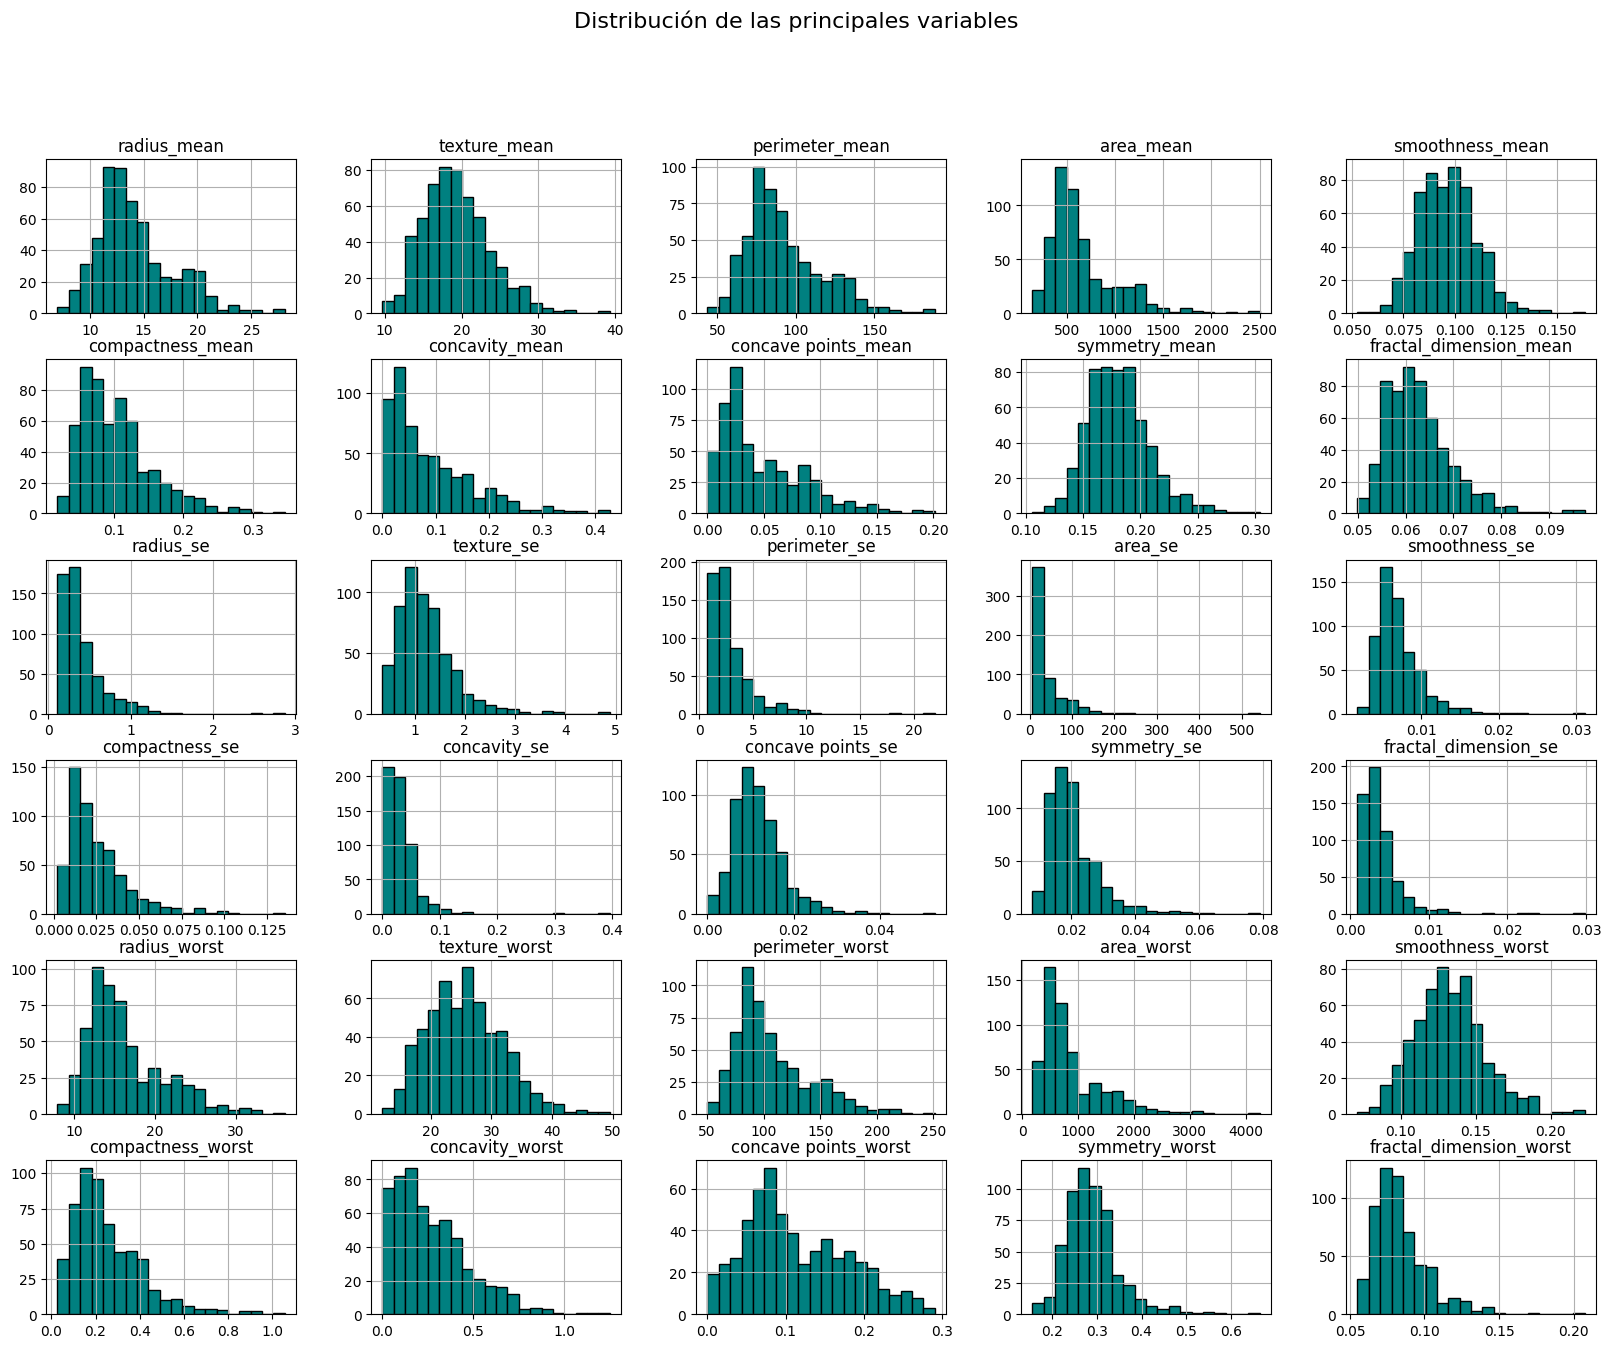

In [ ]:
df_clean1 = df_clean.drop(columns=['diagnosis'])
df_clean1.hist(bins=20, figsize=(20, 15), color='teal', edgecolor='black')
plt.suptitle('Distribución de las principales variables', size=16)
plt.show()

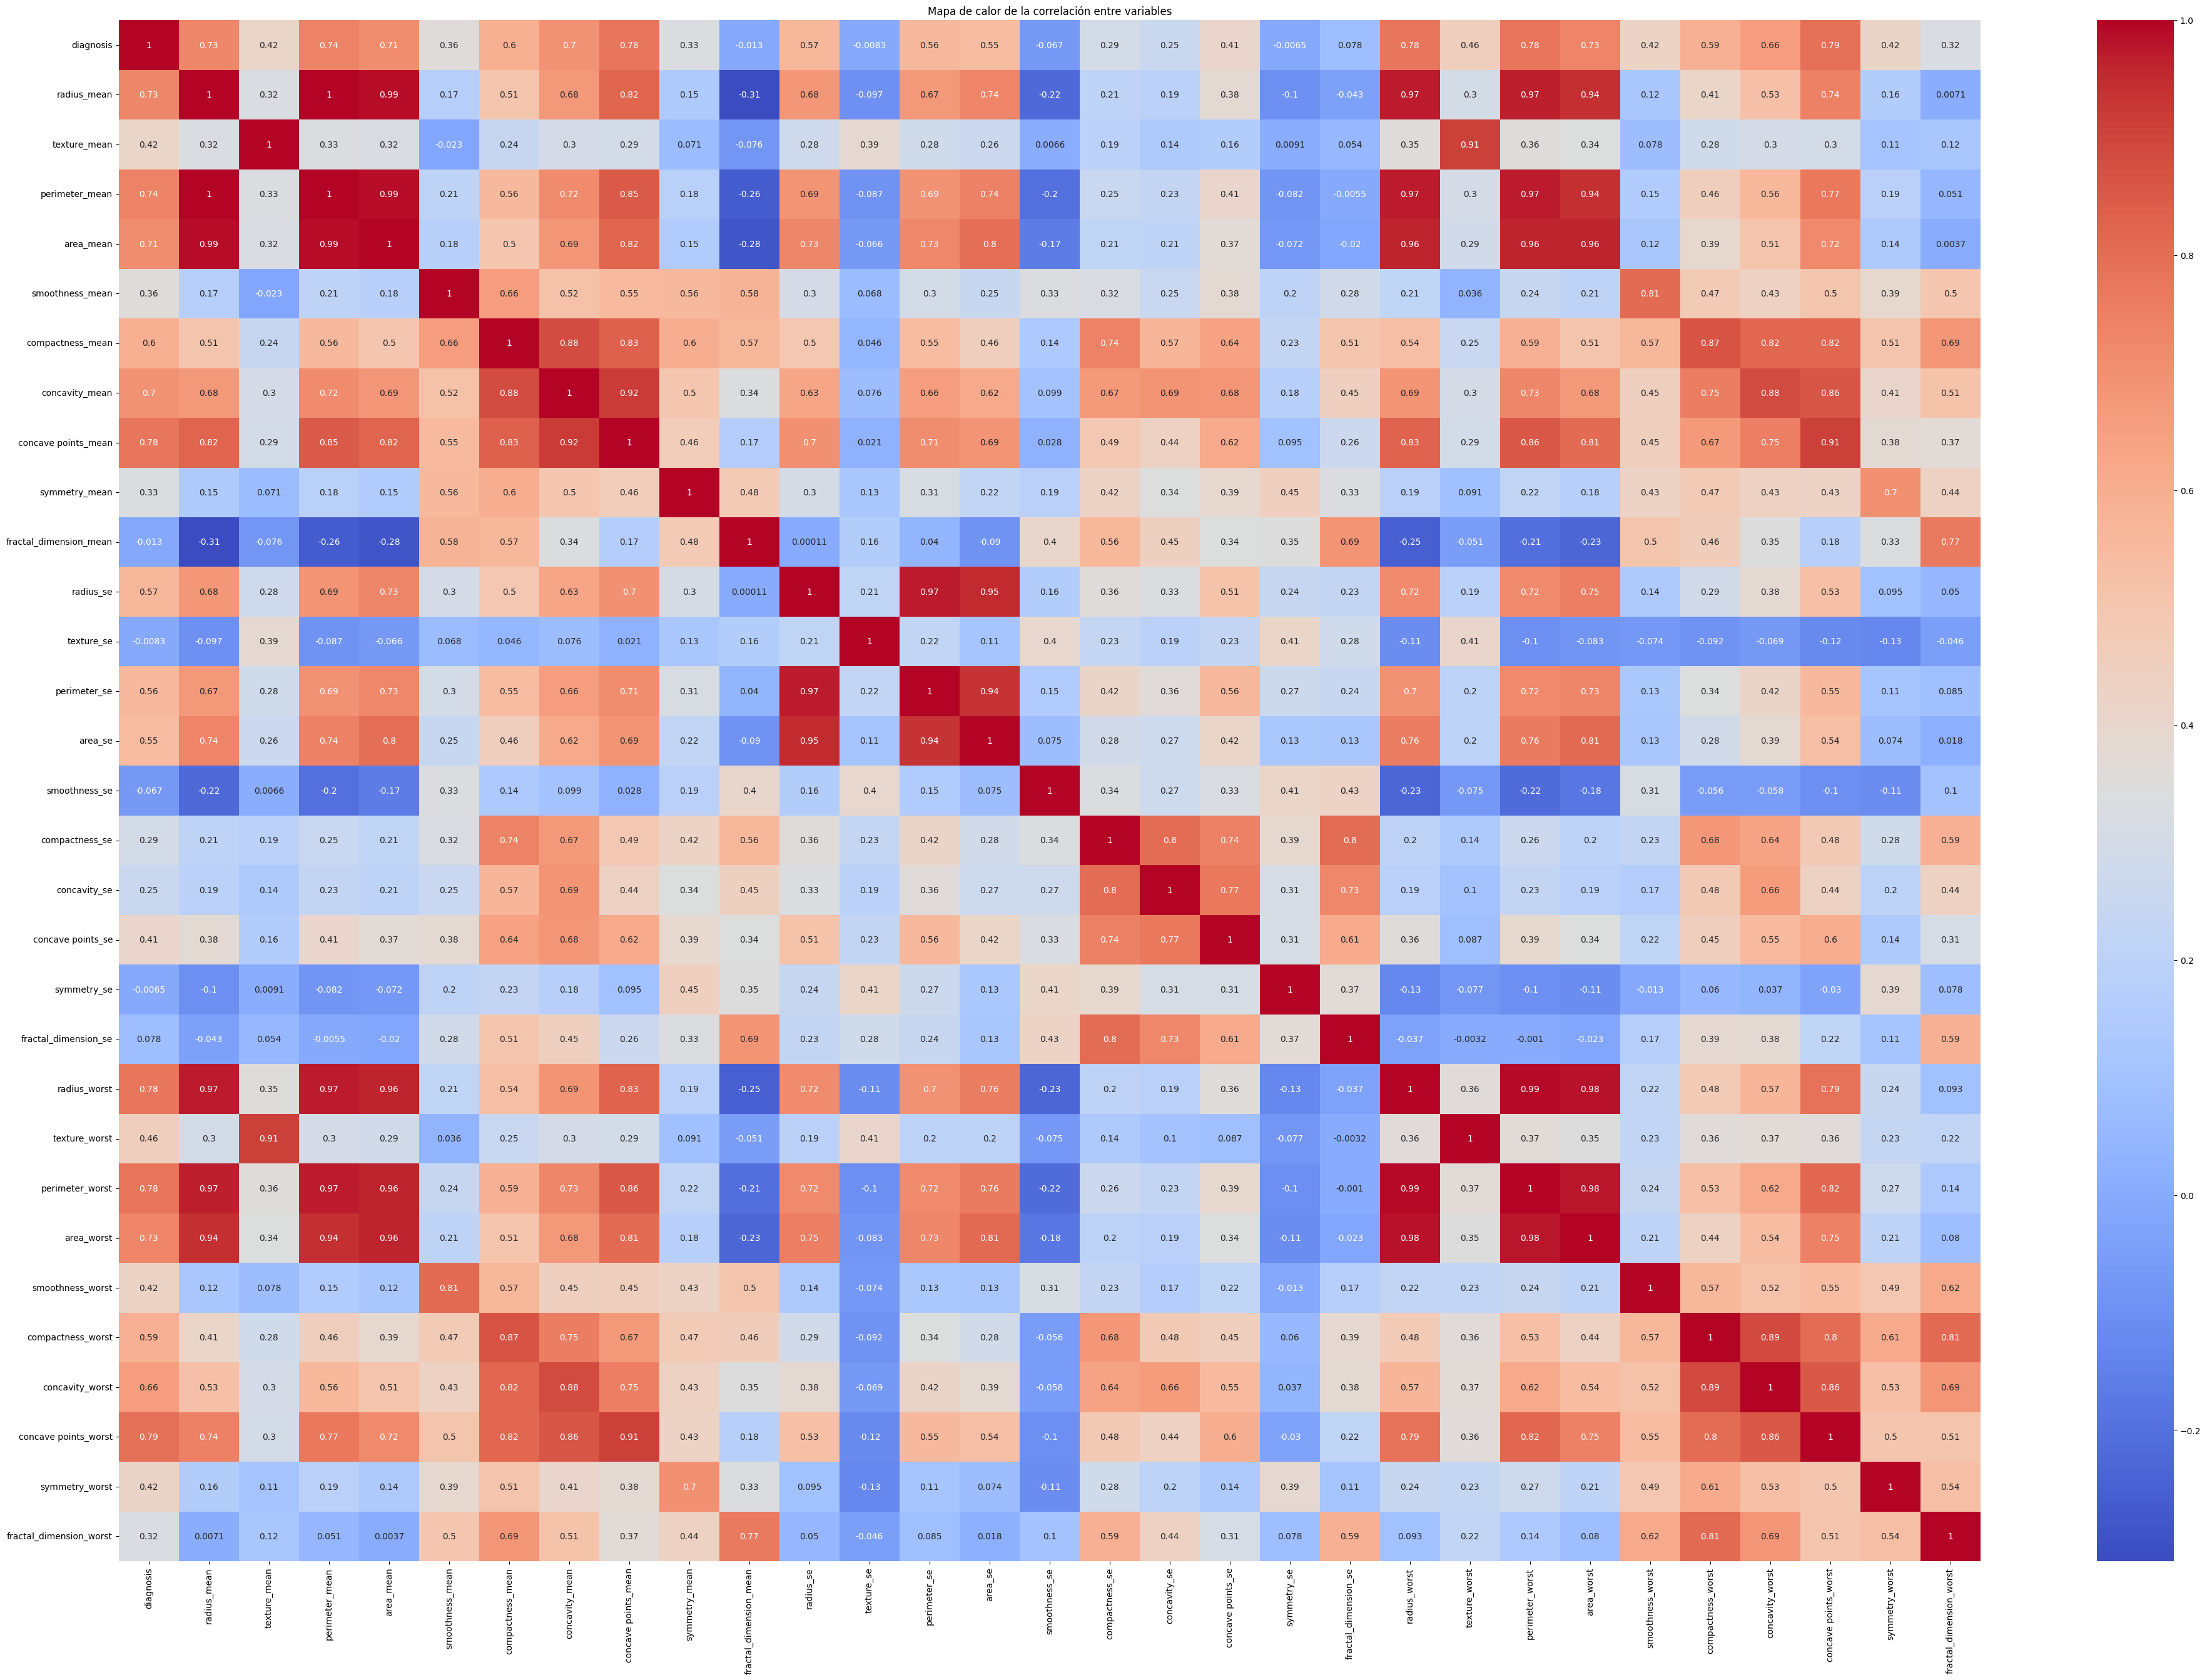

In [ ]:
datos_numericos = df_clean.select_dtypes(include=[np.number])

corr_matrix = datos_numericos.corr()
plt.figure(figsize=(48,32))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

## Section

In [ ]:
X = df_clean.drop(columns=['diagnosis'])  # Variables predictoras
y = df_clean['diagnosis']  # Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# **5. Modelado**

Escalamiento

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

Regression Logística:

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)  # Prediction de clases (0 o 1)
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva (1)

accuracyr = accuracy_score(y_test, y_pred)  # Exactitud
precisionr = precision_score(y_test, y_pred)  # Precisión
recallr = recall_score(y_test, y_pred)  # Sensibilidad (recall)
f1r = f1_score(y_test, y_pred)  # F1 Score
aucr = roc_auc_score(y_test, y_pred_prob)  # Área bajo la curva ROC (AUC)

print(f"Accuracy: {accuracyr:.4f}")
print(f"Precision: {precisionr:.4f}")
print(f"Recall: {recallr:.4f}")
print(f"F1 Score: {f1r:.4f}")
print(f"AUC: {aucr:.4f}")

Accuracy: 0.9942
Precision: 1.0000
Recall: 0.9853
F1 Score: 0.9926
AUC: 0.9949


Random Forest:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(f"Random Forest - AUC: {auc_rf:.4f}")

Random Forest - Accuracy: 0.9825
Random Forest - Precision: 0.9851
Random Forest - Recall: 0.9706
Random Forest - F1 Score: 0.9778
Random Forest - AUC: 0.9920


SVM (Support Vector Machine):

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Corregido de x_test a X_test

accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, y_pred_prob)

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - Precision: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")
print(f"SVM - AUC: {auc_svm:.4f}")

SVM - Accuracy: 0.9708
SVM - Precision: 0.9846
SVM - Recall: 0.9412
SVM - F1 Score: 0.9624
SVM - AUC: 0.9919


In [ ]:
metrics_data = {
    'Model': ['Regresión logística','Random Forest Classifier', 'SVM'],
    'Accuracy': [accuracyr, accuracy_rf, accuracy_svm],
    'Precision': [precisionr, precision_rf, precision_svm],
    'Recall': [recallr, recall_rf, recall_svm],
    'F1 Score': [f1r, f1_rf, f1_svm],
    'AUC': [aucr, auc_rf, auc_svm]
}

df1 = pd.DataFrame(metrics_data)
df1['Harmonic Mean'] = hmean([df1['Accuracy'], df1['Precision'], df1['Recall'], df1['F1 Score'], df1['AUC']])
df1

,Model,Accuracy,Precision,Recall,F1 Score,AUC,Harmonic Mean
0,Regresión logística,0.994152,1.000000,0.985294,0.992593,0.994860,0.993357
1,Random Forest Classifier,0.982456,0.985075,0.970588,0.977778,0.992005,0.981528
2,SVM,0.970760,0.984615,0.941176,0.962406,0.991862,0.969836


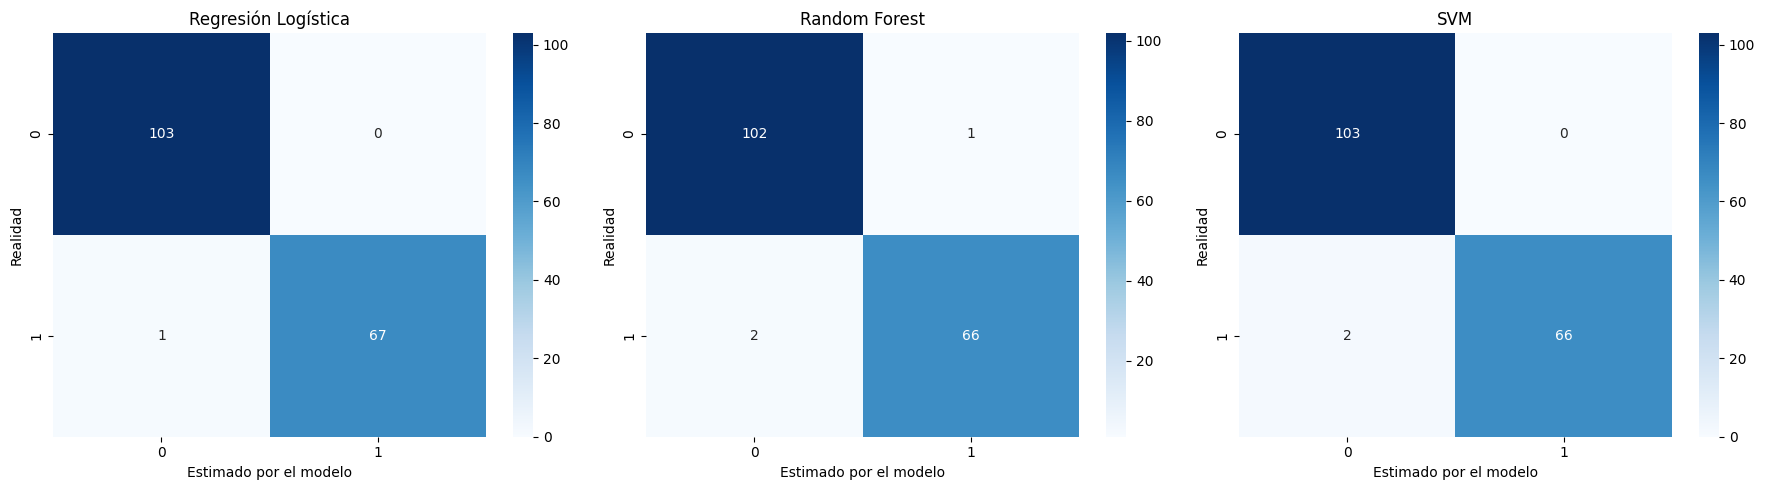

In [ ]:
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Regresión Logística')
axes[0].set_xlabel('Estimado por el modelo')
axes[0].set_ylabel('Realidad')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Estimado por el modelo')
axes[1].set_ylabel('Realidad')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM')
axes[2].set_xlabel('Estimado por el modelo')
axes[2].set_ylabel('Realidad')

plt.tight_layout()
plt.show()

- **Random OverSampling**
- **SMOTE**
- **ADASYN**
- **Random UnderSampling**
- **NearMiss**

In [ ]:
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
rus = RandomUnderSampler(random_state=42)
nm = NearMiss()

In [ ]:
resultados = []

def evaluar_modelo(model, x_train_bal, y_train_bal, x_test, y_test, nombre_metodo, es_regresion=False):
    model.fit(x_train_bal, y_train_bal)
    y_pred = model.predict(x_test)
    if es_regresion:
        y_pred_prob = y_pred
        y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]
    else:
        y_pred_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    resultados.append({
        "Model": type(model).__name__,
        "Método de balanceo": nombre_metodo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC": auc
    })

**Models Utilizados**

In [ ]:
modelos = {
    'Regresión Lineal': (LinearRegression(), True),  # Especificamos que es regresión
    'Regresión Logística': (LogisticRegression(max_iter=500), False),  # Aumentamos max_iter
    'Árbol de Decisión': (DecisionTreeClassifier(random_state=42), False),
    'Bosque Aleatorio': (RandomForestClassifier(n_estimators=100, random_state=42), False),
    'SVC': (SVC(probability=True, random_state=42), False)
}

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for nombre_modelo, (modelo, es_regresion) in modelos.items():
    x_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)
    evaluar_modelo(modelo, x_train_bal, y_train_bal, X_test_scaled, y_test, "RandomOverSampler", es_regresion)

    x_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
    evaluar_modelo(modelo, x_train_bal, y_train_bal, X_test_scaled, y_test, "SMOTE", es_regresion)

    x_train_bal, y_train_bal = adasyn.fit_resample(X_train_scaled, y_train)
    evaluar_modelo(modelo, x_train_bal, y_train_bal, X_test_scaled, y_test, "ADASYN", es_regresion)

    x_train_bal, y_train_bal = rus.fit_resample(X_train_scaled, y_train)
    evaluar_modelo(modelo, x_train_bal, y_train_bal, X_test_scaled, y_test, "RandomUnderSampler", es_regresion)

    x_train_bal, y_train_bal = nm.fit_resample(X_train_scaled, y_train)
    evaluar_modelo(modelo, x_train_bal, y_train_bal, X_test_scaled, y_test, "NearMiss", es_regresion)

bcresults = pd.DataFrame(resultados)

In [ ]:
def calcular_media_armonica(row):
    return hmean([row['Accuracy'], row['Precision'], row['Recall'], row['F1'], row['AUC']])

bcresults['Harmonic Mean'] = bcresults.apply(calcular_media_armonica, axis=1)
bcresults_sorted = bcresults.sort_values(by='Harmonic Mean', ascending=False)

bcresults

,Model,Método de balanceo,Accuracy,Precision,Recall,F1,AUC,Harmonic Mean
0,LinearRegression,RandomOverSampler,0.982456,1.000000,0.955882,0.977444,0.992861,0.981493
1,LinearRegression,SMOTE,0.988304,1.000000,0.970588,0.985075,0.993861,0.987466
2,LinearRegression,ADASYN,0.941520,0.902778,0.955882,0.928571,0.990720,0.942996
3,LinearRegression,RandomUnderSampler,0.988304,1.000000,0.970588,0.985075,0.994575,0.987607
4,LinearRegression,NearMiss,0.982456,1.000000,0.955882,0.977444,0.994432,0.981800
5,LogisticRegression,RandomOverSampler,0.988304,1.000000,0.970588,0.985075,0.994860,0.987663
6,LogisticRegression,SMOTE,0.988304,1.000000,0.970588,0.985075,0.994717,0.987635
7,LogisticRegression,ADASYN,0.988304,1.000000,0.970588,0.985075,0.992147,0.987127
8,LogisticRegression,RandomUnderSampler,0.988304,0.985294,0.985294,0.985294,0.994860,0.987795
9,LogisticRegression,NearMiss,0.994152,1.000000,0.985294,0.992593,0.994860,0.993357


In [ ]:
resultados = []

X = df_clean.drop(columns=['diagnosis'])
y = df_clean['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
def evaluar_modelo_cv(model, X, y, nombre_metodo, es_regresion=False, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    aucs = []

    for train_index, test_index in skf.split(X, y):
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        if es_regresion:
            y_pred_prob = y_pred  # Prediction continua
            y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]  # Umbral para convertir en clasificación
        else:
            y_pred_prob = model.predict_proba(x_test)[:, 1]

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_pred_prob))

    accuracy_mean = np.mean(accuracies)
    precision_mean = np.mean(precisions)
    recall_mean = np.mean(recalls)
    f1_mean = np.mean(f1s)
    auc_mean = np.mean(aucs)

    harmonic_mean = hmean([accuracy_mean, precision_mean, recall_mean, f1_mean])

    resultados.append({
        "Model": type(model).__name__,
        "Método de balanceo": nombre_metodo,
        "Accuracy": accuracy_mean,
        "Precision": precision_mean,
        "Recall": recall_mean,
        "F1": f1_mean,
        "AUC": auc_mean,
        "Harmonic Mean": harmonic_mean
    })

# Models a usar
modelos = {
    'Regresión Lineal': (LinearRegression(), True),  # Especificamos que es regresión
    'Regresión Logística': (LogisticRegression(max_iter=500), False),
    'Árbol de Decisión': (DecisionTreeClassifier(random_state=42), False),
    'Bosque Aleatorio': (RandomForestClassifier(n_estimators=100, random_state=42), False),
    'SVC': (SVC(probability=True, random_state=42), False)
}

samplers = {
    'RandomOverSampler': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'RandomUnderSampler': RandomUnderSampler(),
    'NearMiss': NearMiss()
}

X = np.array(X)
y = np.array(y)

for nombre_modelo, (modelo, es_regresion) in modelos.items():
    for nombre_metodo, sampler in samplers.items():
        X_bal, y_bal = sampler.fit_resample(X_train, y_train)
        evaluar_modelo_cv(modelo, X_bal, y_bal, nombre_metodo, es_regresion)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
bcresults2 = pd.DataFrame(resultados)
bcresults2

,Model,Método de balanceo,Accuracy,Precision,Recall,F1,AUC,Harmonic Mean
0,LinearRegression,RandomOverSampler,0.964628,0.980758,0.948941,0.963404,0.995520,0.964301
1,LinearRegression,SMOTE,0.962667,0.984226,0.941098,0.961193,0.994839,0.962054
2,LinearRegression,ADASYN,0.942691,0.941623,0.944549,0.942667,0.988226,0.942881
3,LinearRegression,RandomUnderSampler,0.934059,0.979064,0.889163,0.930537,0.989986,0.932123
4,LinearRegression,NearMiss,0.916636,0.969208,0.861330,0.911902,0.978053,0.913175
5,LogisticRegression,RandomOverSampler,0.940982,0.955480,0.925333,0.939723,0.990330,0.940259
6,LogisticRegression,SMOTE,0.942904,0.955788,0.929176,0.942042,0.989106,0.942384
7,LogisticRegression,ADASYN,0.948612,0.938350,0.960392,0.949124,0.985761,0.949055
8,LogisticRegression,RandomUnderSampler,0.947973,0.954259,0.944335,0.948235,0.988245,0.948687
9,LogisticRegression,NearMiss,0.913128,0.941640,0.881773,0.910179,0.979107,0.911187


In [ ]:
dataframes = [('df1', df1), ('bcresults', bcresults), ('bcresults2', bcresults2)]

# Dictionary to store the maximum Harmonic Mean from each DataFrame and corresponding model
max_values = {}
model_names = {}

# Loop to calculate maximum Harmonic Mean for each DataFrame and get corresponding model name
for name, df in dataframes:
    # Check if 'Harmonic Mean' and 'Model' columns exist in the DataFrame
    if 'Harmonic Mean' in df.columns and 'Model' in df.columns:
        # Get the index of the maximum Harmonic Mean
        max_index = df['Harmonic Mean'].idxmax()
        # Store the maximum value and corresponding model name in the dictionary
        max_values[name] = df['Harmonic Mean'].max()
        model_names[name] = df.loc[max_index, 'Model']
    else:
        print(f"El DataFrame {name} no tiene las columnas 'Harmonic Mean' o 'Model'.")

if max_values:
    max_overall = max(max_values, key=max_values.get)  # Find the DataFrame with the maximum value
    print("Valores máximos por DataFrame:", max_values)
    print(f"El mayor valor global está en '{max_overall}' con un valor de:", max_values[max_overall])
    print(f"El modelo correspondiente es: {model_names[max_overall]}")
else:
    print("Ninguno de los DataFrames tiene la columna 'Harmonic Mean'.")

Valores máximos por DataFrame: {'df1': 0.9933570463477173, 'bcresults': 0.9933570463477173, 'bcresults2': 0.9746968001261945}
El mayor valor global está en 'df1' con un valor de: 0.9933570463477173
El modelo correspondiente es: Regresión logística


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

n = pd.read_csv('breastcancer.csv')
ns = n.drop(columns=['Unnamed: 32', 'id'])

X = ns.drop(columns=['diagnosis'])
y = ns['diagnosis']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data_scaled, columns=X.columns)

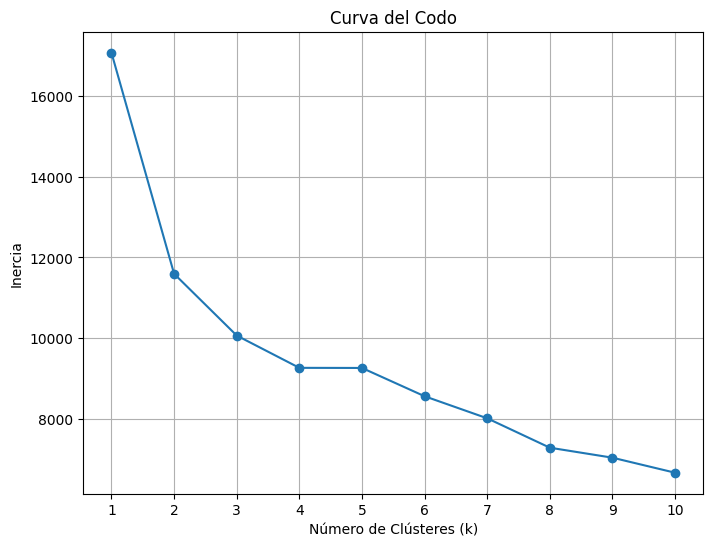

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-')
plt.title('Curva del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
ns['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Puntaje Silhouette: {silhouette_avg}')

Puntaje Silhouette: 0.3151862330494096


In [ ]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print("Centroides de los Clústeres:")
centroids_df

Centroides de los Clústeres:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.200140,0.176099,-0.127000,-0.244808,0.847597,1.046027,0.778342,0.486340,0.755745,1.229095,...,-0.112462,0.308915,-0.030267,-0.177578,0.959132,1.196008,1.048401,0.726721,0.795393,1.423379
1,1.555747,0.600998,1.559993,1.588325,0.393633,0.887147,1.188043,1.431039,0.420508,-0.305203,...,1.600758,0.527693,1.590179,1.607799,0.345607,0.638988,0.858788,1.241700,0.302797,0.069328
2,-0.463742,-0.248586,-0.485198,-0.462361,-0.363462,-0.582339,-0.609289,-0.610276,-0.347252,-0.235052,...,-0.502770,-0.260544,-0.521766,-0.487275,-0.378016,-0.540715,-0.573536,-0.613030,-0.318879,-0.413131


In [ ]:
pca = PCA()
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)

data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

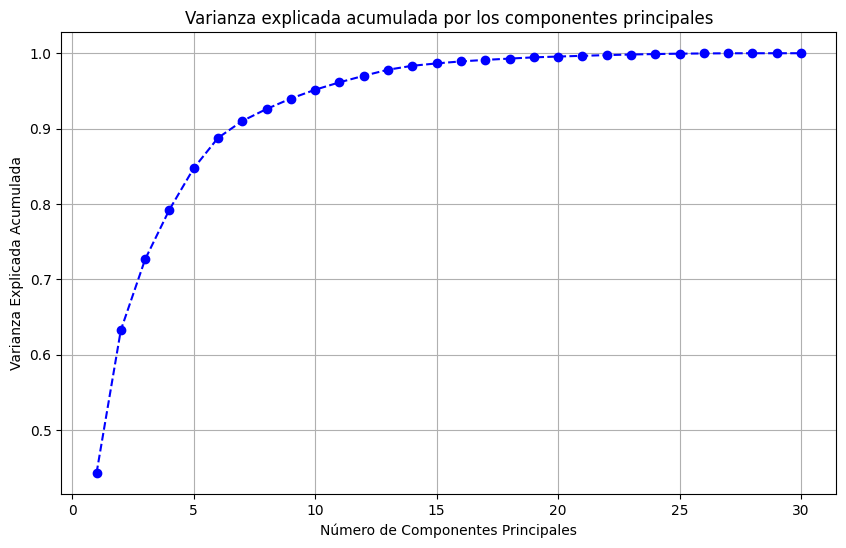

In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por los componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

In [ ]:
for i, var in enumerate(explained_variance[:10], start=1):
    print(f'Componente {i}: {var:.4f} de la varianza explicada')

Componente 1: 0.4427 de la varianza explicada
Componente 2: 0.1897 de la varianza explicada
Componente 3: 0.0939 de la varianza explicada
Componente 4: 0.0660 de la varianza explicada
Componente 5: 0.0550 de la varianza explicada
Componente 6: 0.0402 de la varianza explicada
Componente 7: 0.0225 de la varianza explicada
Componente 8: 0.0159 de la varianza explicada
Componente 9: 0.0139 de la varianza explicada
Componente 10: 0.0117 de la varianza explicada


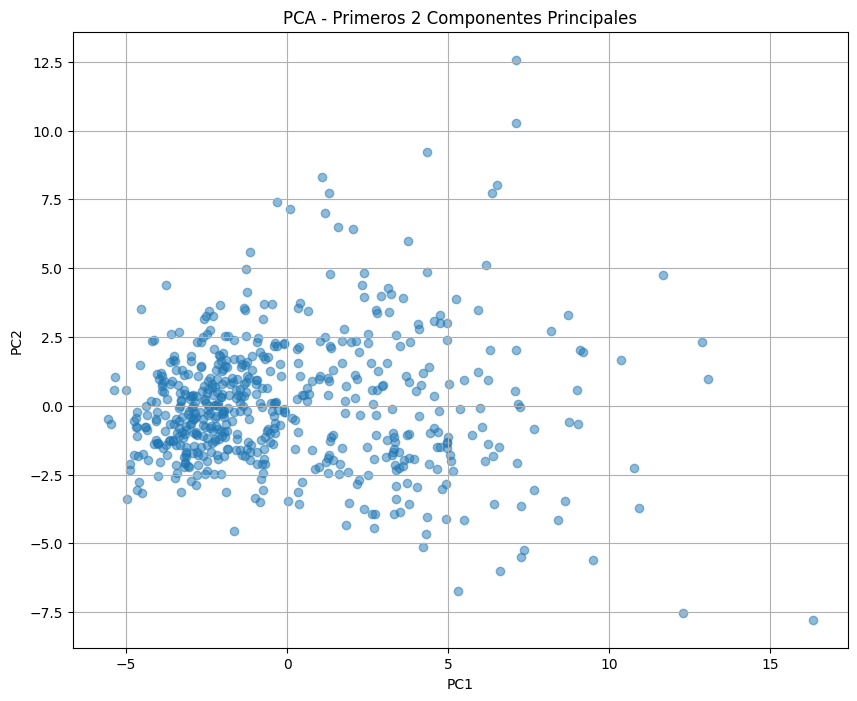

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], alpha=0.5)
plt.title('PCA - Primeros 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [ ]:
data = pd.read_csv('breastcancer.csv')

data_cleaned = data.drop(columns=['Unnamed: 32', 'id'])

data_for_clustering = data_cleaned.drop(columns=['diagnosis'])
data_scaled = scaler.fit_transform(data_for_clustering)

pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
data_cleaned['Cluster'] = kmeans.labels_

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por los componentes principales: {explained_variance}')

Varianza explicada por los componentes principales: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


Puntuación de Silhouette después de PCA: 0.34163103780550214


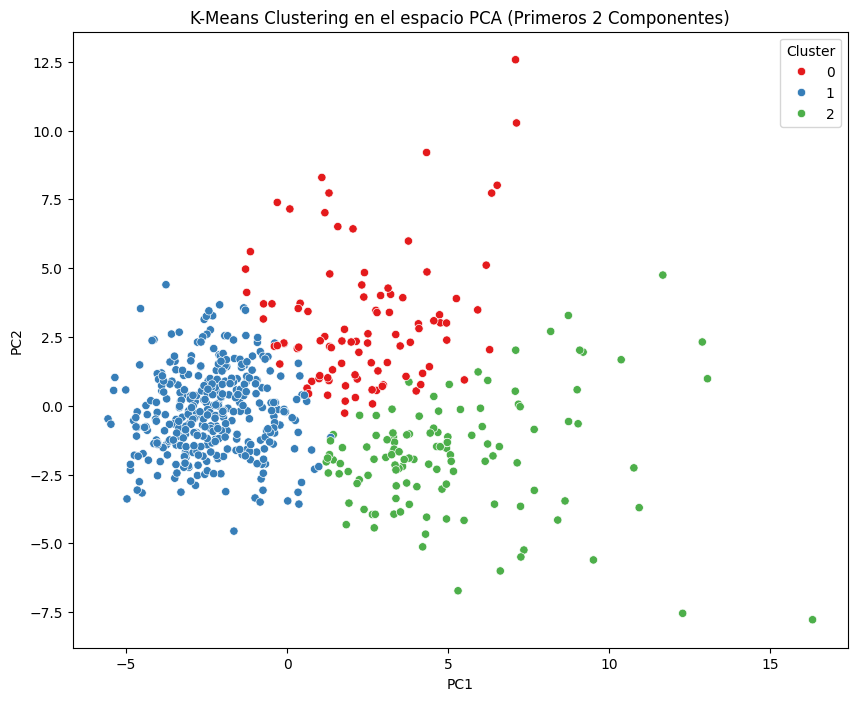

In [ ]:
silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print(f'Puntuación de Silhouette después de PCA: {silhouette_avg}')

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data_cleaned['Cluster'], palette='Set1')
plt.title('K-Means Clustering en el espacio PCA (Primeros 2 Componentes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

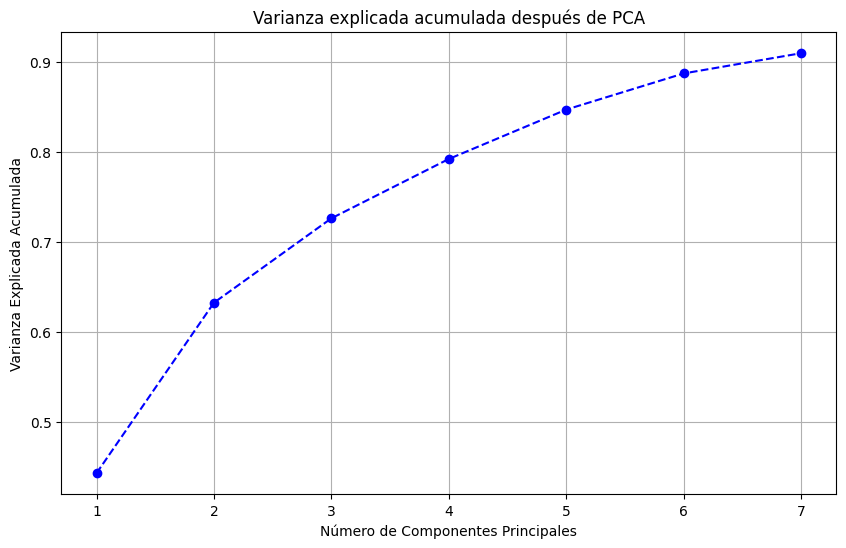

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada después de PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()